# Baseball Case Study

## Importing Libraries

In [278]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [279]:
df=pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


#### Input features: 
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
#### Target Variable:
- Number of predicted Wins (W)

In [280]:
#checking the shape of dataset
df.shape

(30, 17)

In our dataset, we have only 30 rows and 17 columns including the target variable W.

In [281]:
#checking the column names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

These are our 17 columns. Let's give them meaningful names.

In [282]:
#Giving Meaningful names to the columns
df.rename(columns={"W":"Wins",
                   "R":"Runs",
                   "AB":"At Bats",
                   "H":"Hits",
                   "2B":"Doubles",
                   "3B":"Triples",
                   "HR":"Homeruns",
                   "BB":"Walks",
                   "SO":"Strikeouts",
                   "SB":"Stolen Bases",
                   "RA":"Runs Allowed",
                   "ER":"Earned Runs",
                   "ERA":"Earned Run Average",
                   "CG":"Complete Games",
                   "SHO":"Shutouts",
                   "SV":"Saves",
                   "E":"Errors"},inplace=True)

In [283]:
#first 5 rows of dataset
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [284]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In our dataset, we have all integer values except for the column "Earned Run Average" which has float values.

In [285]:
#checking the unique values for each column.
df.nunique()

Wins                  24
Runs                  28
At Bats               29
Hits                  29
Doubles               22
Triples               23
Homeruns              27
Walks                 29
Strikeouts            29
Stolen Bases          27
Runs Allowed          30
Earned Runs           30
Earned Run Average    30
Complete Games         9
Shutouts              12
Saves                 20
Errors                21
dtype: int64

In [286]:
#checking missing values
df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

There are no missing values in our dataset.

<AxesSubplot:>

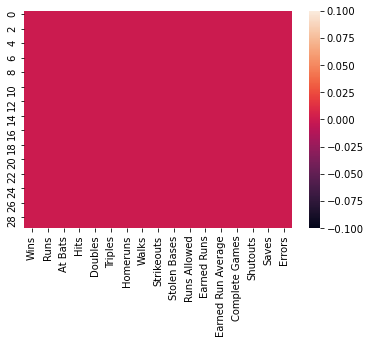

In [287]:
#plotting heatmap to view the missing values
sns.heatmap(df.isnull())

In [288]:
#statistical information
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Statistical observations are:
- Since the count for each column is 30, that means there are no missing values.
- There is no difference between the Mean and Median for almost all the columns that means the distribution is normal.
- There is not much difference in the 75th percentile and Max values, hence we can say that there are no outliers present. 

## EDA

### A] Univariate Analysis

#### Plotting boxplots to check outliers

Wins                      AxesSubplot(0.125,0.71587;0.133621x0.16413)
Runs                   AxesSubplot(0.285345,0.71587;0.133621x0.16413)
At Bats                 AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Hits                   AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Doubles                AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Triples                  AxesSubplot(0.125,0.518913;0.133621x0.16413)
Homeruns              AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Walks                  AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Strikeouts            AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Stolen Bases          AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Runs Allowed             AxesSubplot(0.125,0.321957;0.133621x0.16413)
Earned Runs           AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Earned Run Average     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Complete Games        AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Shutouts            

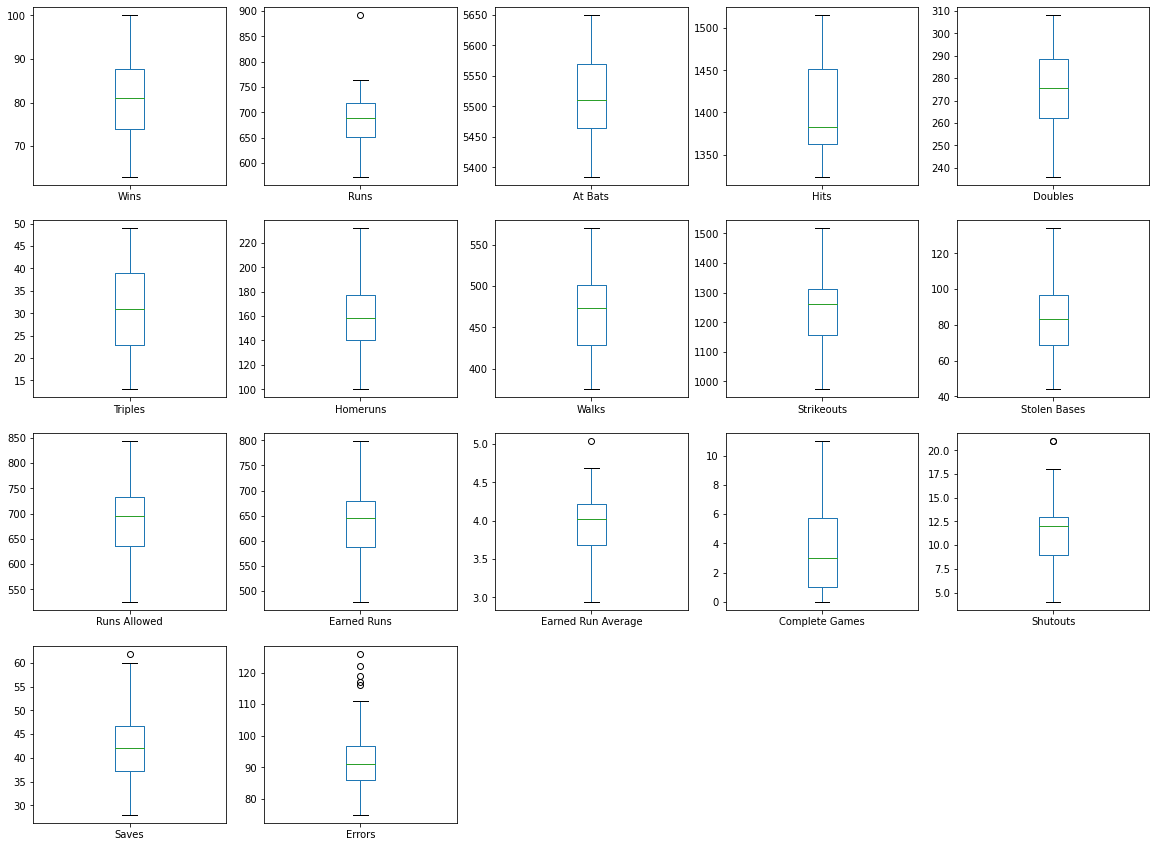

In [289]:
df.plot(kind="box",subplots=True,layout=(4,5),figsize=(20,15))

#### Above boxplots shows that we have Outliers in:
- Runs
- Earned Run Average
- Shutouts
- Saves
- Errors

#### Plotting distplots to check distribution for all columns

<AxesSubplot:xlabel='Hits', ylabel='Density'>

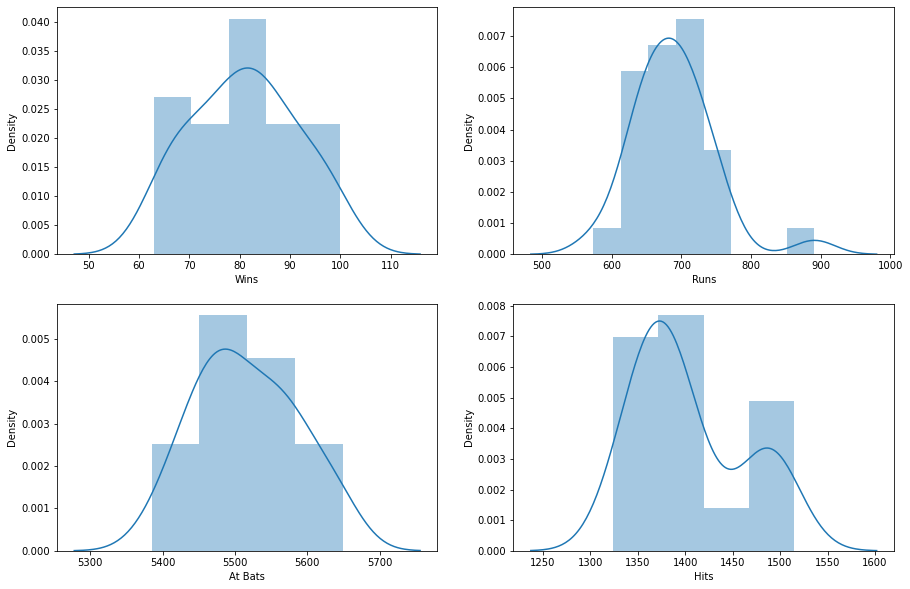

In [290]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df["Wins"])
plt.subplot(2,2,2)
sns.distplot(df["Runs"])
plt.subplot(2,2,3)
sns.distplot(df["At Bats"])
plt.subplot(2,2,4)
sns.distplot(df["Hits"])

From the above plots we can conclude that Wins, Runs and At Bats have normal distribution except for Hits.

<AxesSubplot:xlabel='Walks', ylabel='Density'>

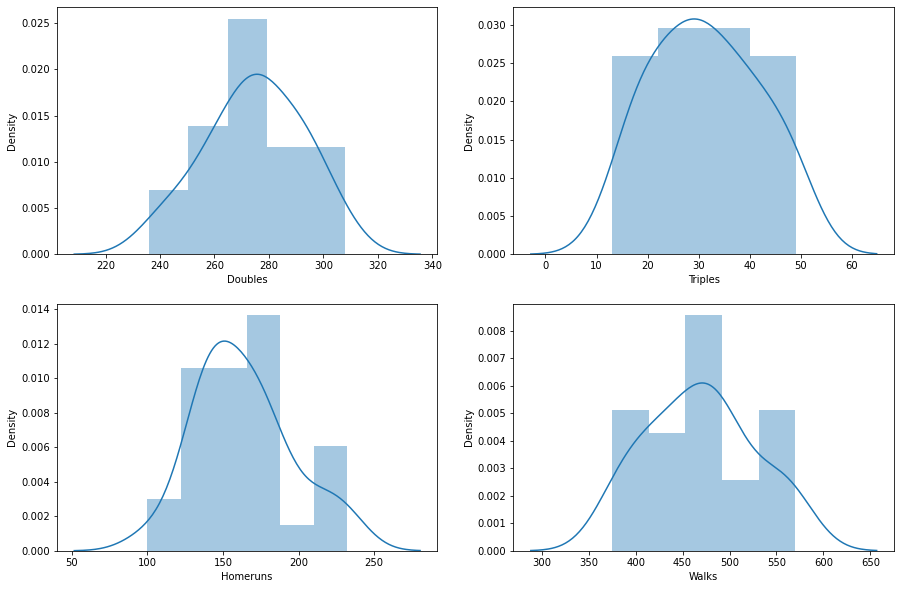

In [291]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df["Doubles"])
plt.subplot(2,2,2)
sns.distplot(df["Triples"])
plt.subplot(2,2,3)
sns.distplot(df["Homeruns"])
plt.subplot(2,2,4)
sns.distplot(df["Walks"])

The distribution for above columns is normal.

<AxesSubplot:xlabel='Stolen Bases', ylabel='Density'>

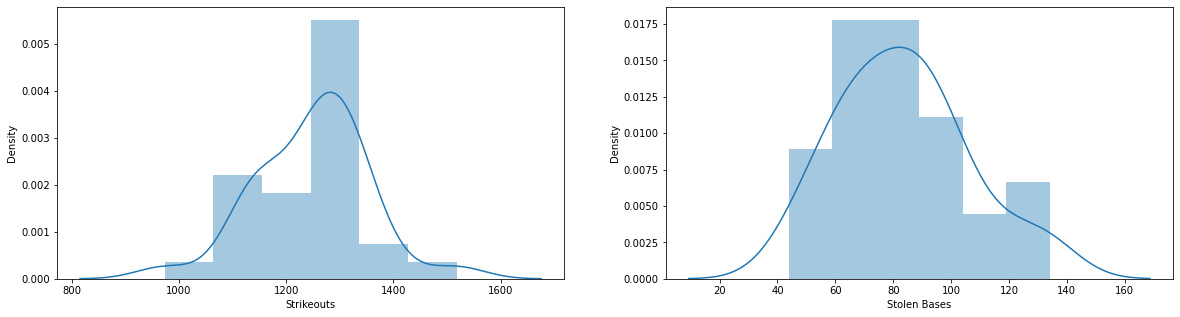

In [292]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df["Strikeouts"])
plt.subplot(1,2,2)
sns.distplot(df["Stolen Bases"])

For Strikeouts the distribution is slight normal and that for Stolen Bases is normal.

<AxesSubplot:xlabel='Earned Run Average', ylabel='Density'>

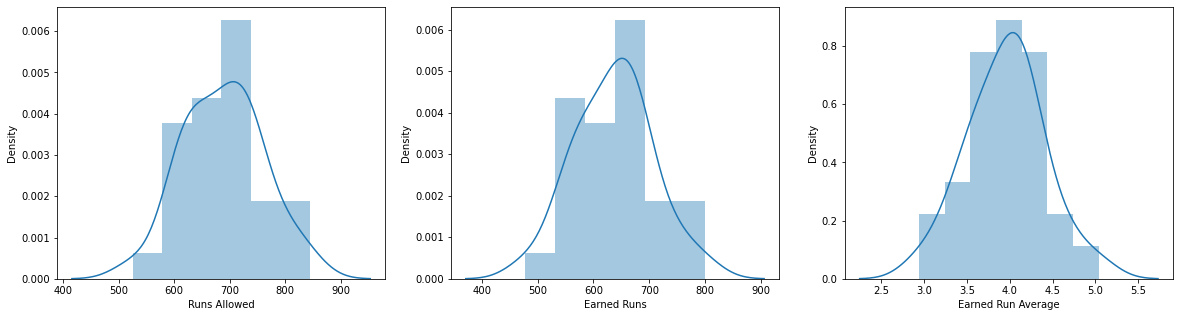

In [293]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df["Runs Allowed"])
plt.subplot(1,3,2)
sns.distplot(df["Earned Runs"])
plt.subplot(1,3,3)
sns.distplot(df["Earned Run Average"])


Distribution is normal for Runs Allowed, Earned Runs and Earned Run Average.

<AxesSubplot:xlabel='Errors', ylabel='Density'>

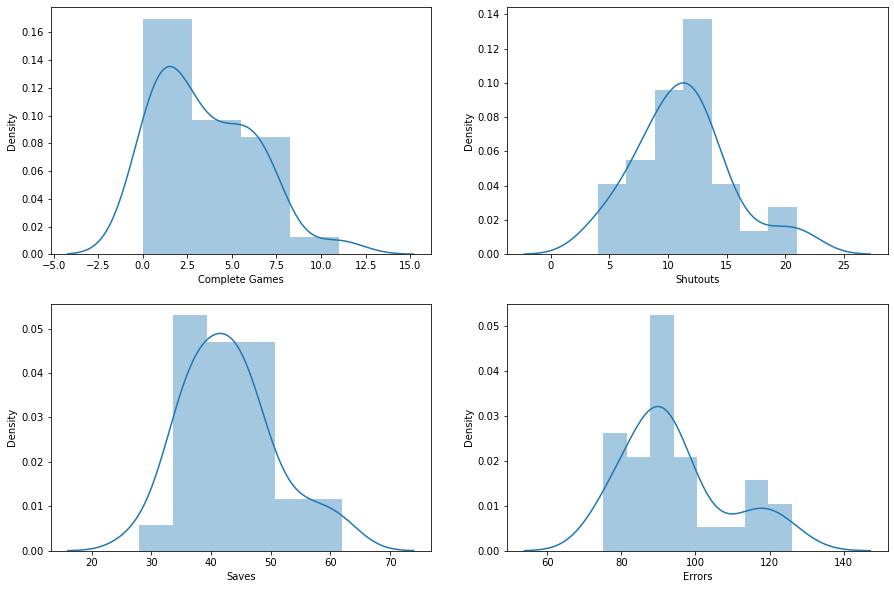

In [294]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df["Complete Games"])
plt.subplot(2,2,2)
sns.distplot(df["Shutouts"])
plt.subplot(2,2,3)
sns.distplot(df["Saves"])
plt.subplot(2,2,4)
sns.distplot(df["Errors"])

The distribution is slightly normal for Complete Gaes and Errors. Its perfectly normal for Saves and Shutouts.

### B] Bivariate Analysis

<AxesSubplot:xlabel='Runs', ylabel='Wins'>

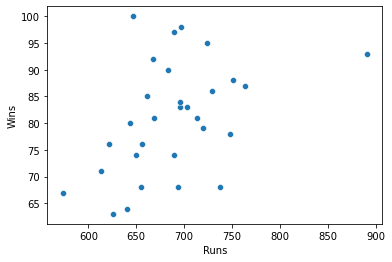

In [295]:
#plt.figure(figsize=(8,5))
sns.scatterplot(x="Runs",y="Wins",data=df)

Above scatterplot shows a Upward trend that means with the increase in number of Runs the number of Wins also increases.

<AxesSubplot:xlabel='At Bats', ylabel='Wins'>

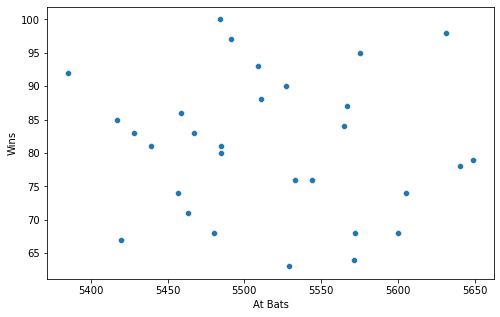

In [296]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="At Bats",y="Wins",data=df)

Above scatterplot shows no relation between At Bats and Wins. 

<AxesSubplot:xlabel='Hits', ylabel='Wins'>

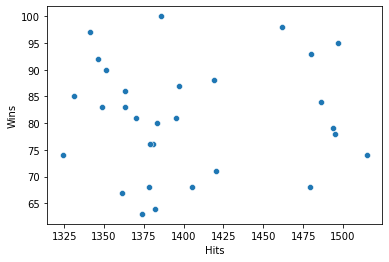

In [297]:
#plt.figure(figsize=(8,5))
sns.scatterplot(x="Hits",y="Wins",data=df)

Above scatterplot shows no relation between At Bats and Wins.

<AxesSubplot:xlabel='Doubles', ylabel='Wins'>

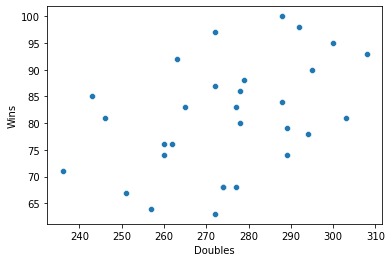

In [298]:
#plt.figure(figsize=(8,5))
sns.scatterplot(x="Doubles",y="Wins",data=df)

From above scatterplot we can see a slight positive relationship between Doubles and Number of Wins.

<AxesSubplot:xlabel='Triples', ylabel='Wins'>

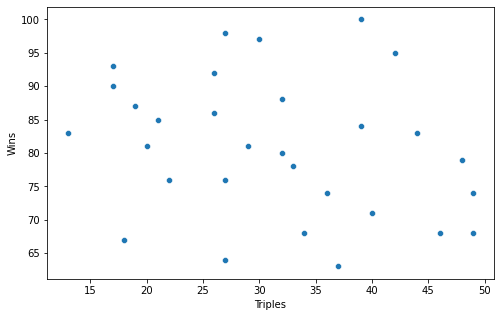

In [299]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Triples",y="Wins",data=df)

Above plot shows no relationship between Triples and Wins.

<AxesSubplot:xlabel='Homeruns', ylabel='Wins'>

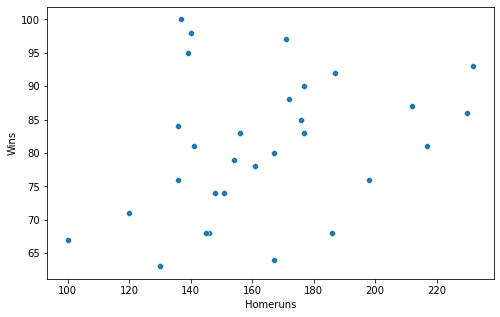

In [300]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Homeruns",y="Wins",data=df)

Above plot shows positive relationship between Homeruns and Wins.

<AxesSubplot:xlabel='Strikeouts', ylabel='Wins'>

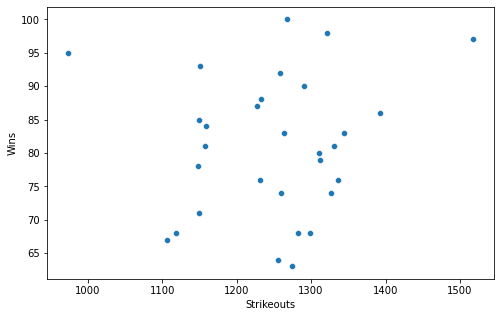

In [301]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Strikeouts",y="Wins",data=df)

Above plot shows a range from 1100 to 1370 of Strikeouts for the Number of Wins. 

<AxesSubplot:xlabel='Walks', ylabel='Wins'>

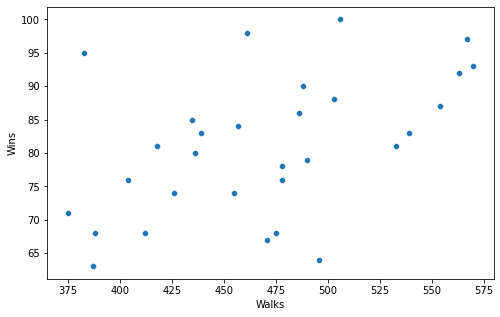

In [302]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Walks",y="Wins",data=df)

Here we see a positive relationship between Walks and Wins.

<AxesSubplot:xlabel='Stolen Bases', ylabel='Wins'>

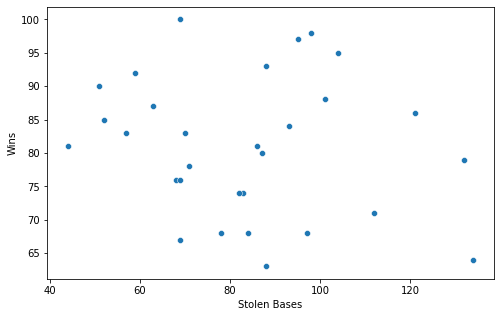

In [303]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Stolen Bases",y="Wins",data=df)

There is no relationship between Stolen Bases and Wins.

<AxesSubplot:xlabel='Runs Allowed', ylabel='Wins'>

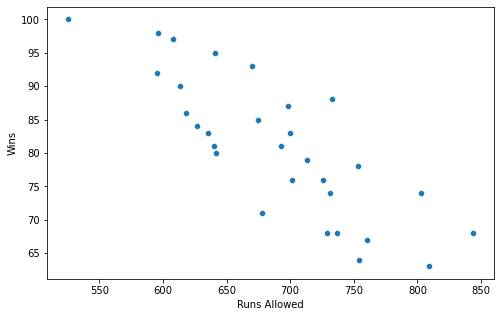

In [304]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Runs Allowed",y="Wins",data=df)

Above plot shows a strong negative relationship between Runs Allowed and Wins, that means with the increase in Runs Allowed the Number of Wins will decrease.

<AxesSubplot:xlabel='Earned Runs', ylabel='Wins'>

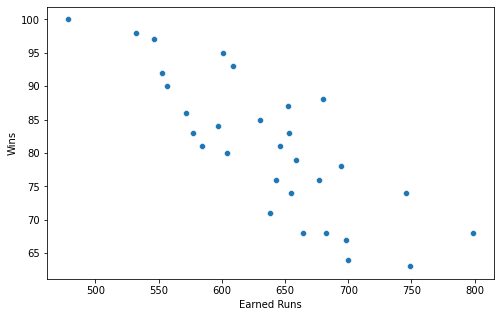

In [305]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Earned Runs",y="Wins",data=df)

Here also we see a negative relationship between Earned Runs and Wins. There is a downing trend.

<AxesSubplot:xlabel='Earned Run Average', ylabel='Wins'>

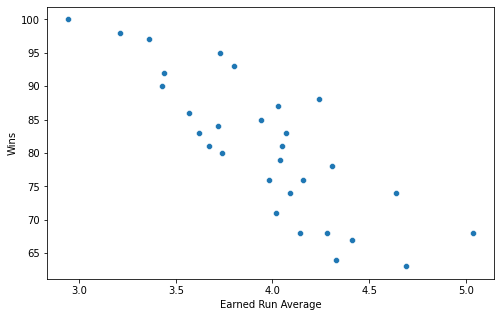

In [306]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Earned Run Average",y="Wins",data=df)

Above plot shows a downward trend for Earned Run Average and Wins. With increase in Earned Run Average, number of Wins will decrease.

<AxesSubplot:xlabel='Complete Games', ylabel='Wins'>

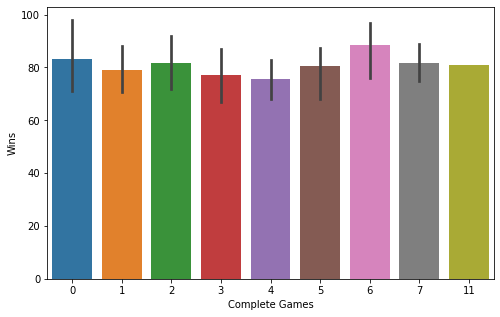

In [307]:
plt.figure(figsize=(8,5))
sns.barplot(x="Complete Games",y="Wins",data=df)

The barplot does not show any relationship between Complete Gamed and Number of Wins.

<AxesSubplot:xlabel='Shutouts', ylabel='Wins'>

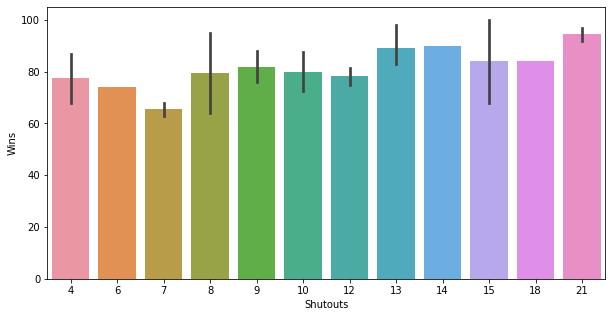

In [308]:
plt.figure(figsize=(10,5))
sns.barplot(x="Shutouts",y="Wins",data=df)

Above barplot cannot define any relationship between Shutouts and Wins.

<AxesSubplot:xlabel='Saves', ylabel='Wins'>

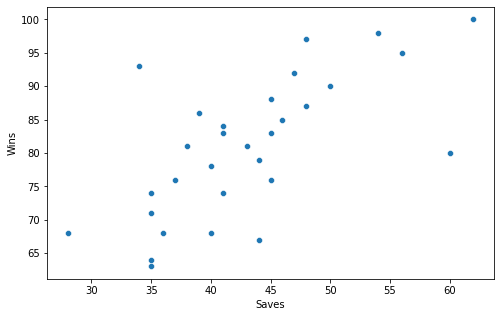

In [309]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Saves",y="Wins",data=df)

Above scatterplot shows a strong positive relationship between Saves and Number of Wins.

<AxesSubplot:xlabel='Errors', ylabel='Wins'>

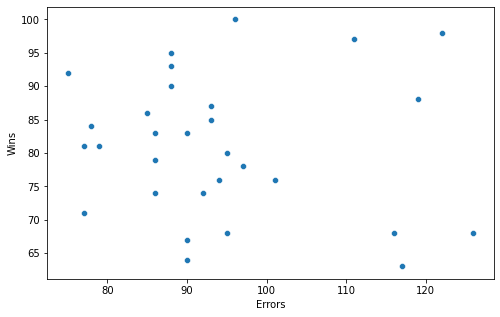

In [310]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Errors",y="Wins",data=df)

There is no relationship between Errors and Wins.

### C] Multivariate Analysis

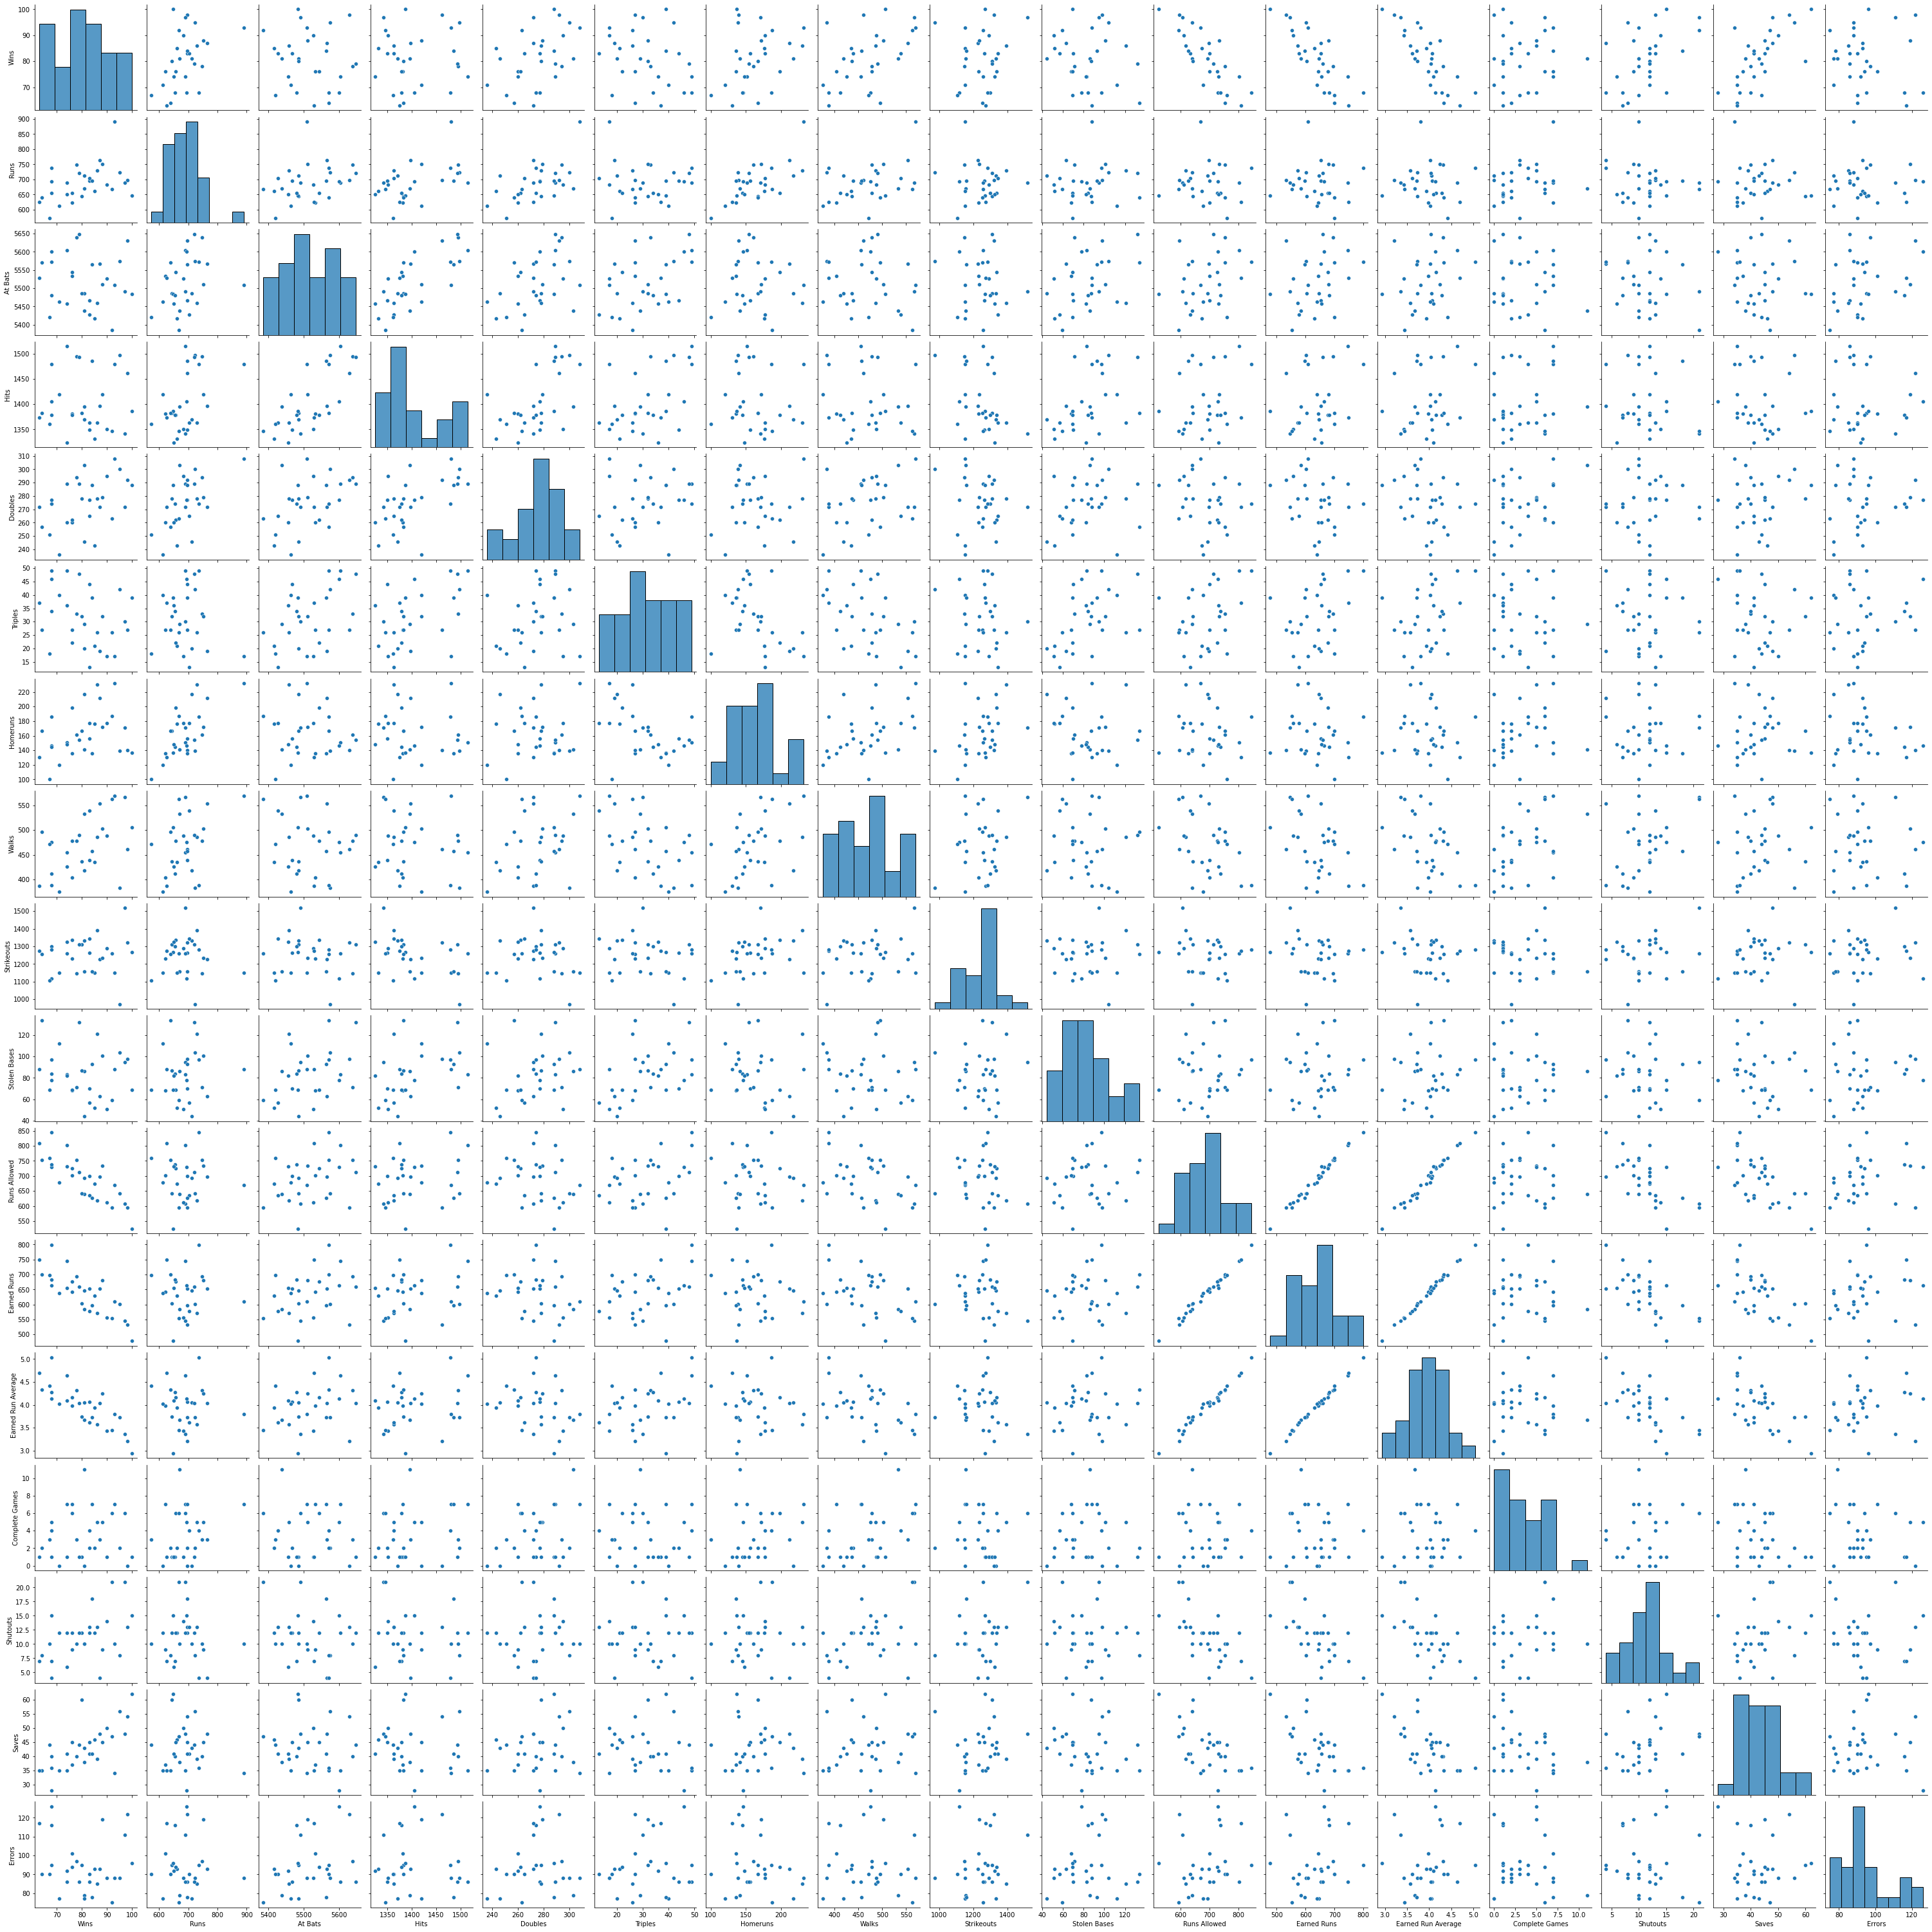

In [311]:
sns.pairplot(df)

Above pairplot shows that distribution for almost all the columns is normal. The scatterplot distribution is not clear due to too many columns.

<AxesSubplot:>

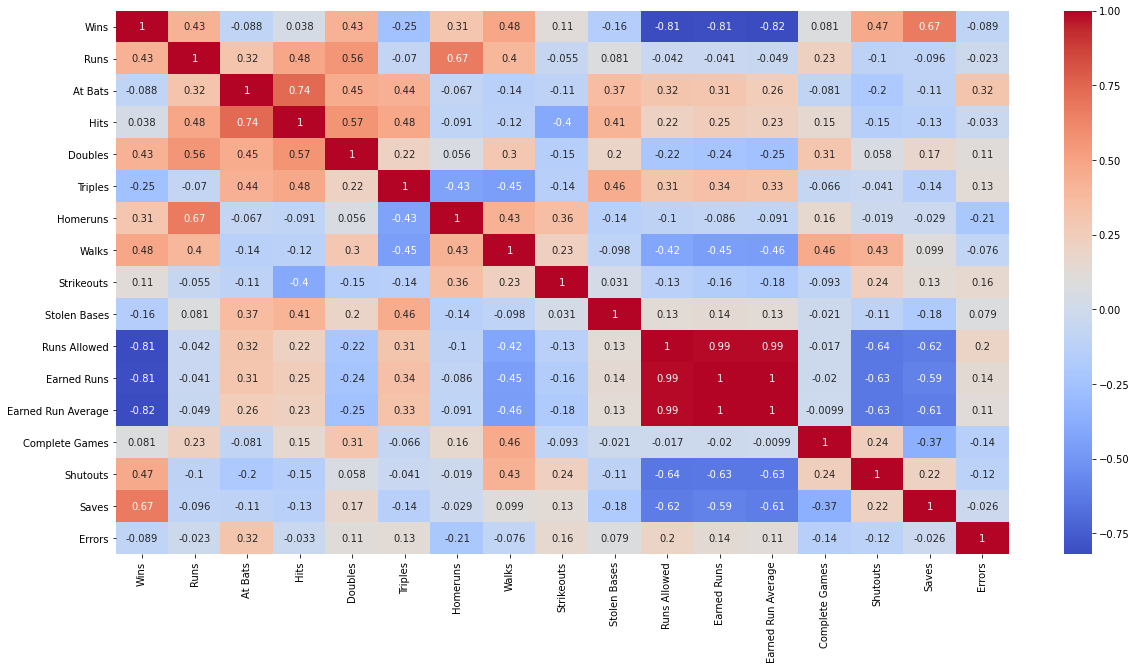

In [312]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

#### Observations:
- Target variable Wins is highly correlated with Saves and Walks columns. Its least correlated with "Hits" and "Complete Games".
- Runs Allowed, Earned Runs and Earned Run Average are highly positively correlated with each other. This may cause multicollinearity problem. We can remove two of these columns "Runs Allowed" and "Runs Earned" which are least correlated with Target Variable to resolve multicollinearity problem.
- Hits and At Bats are also highly correlated with each. Runs and Homeruns are too highly correlated.

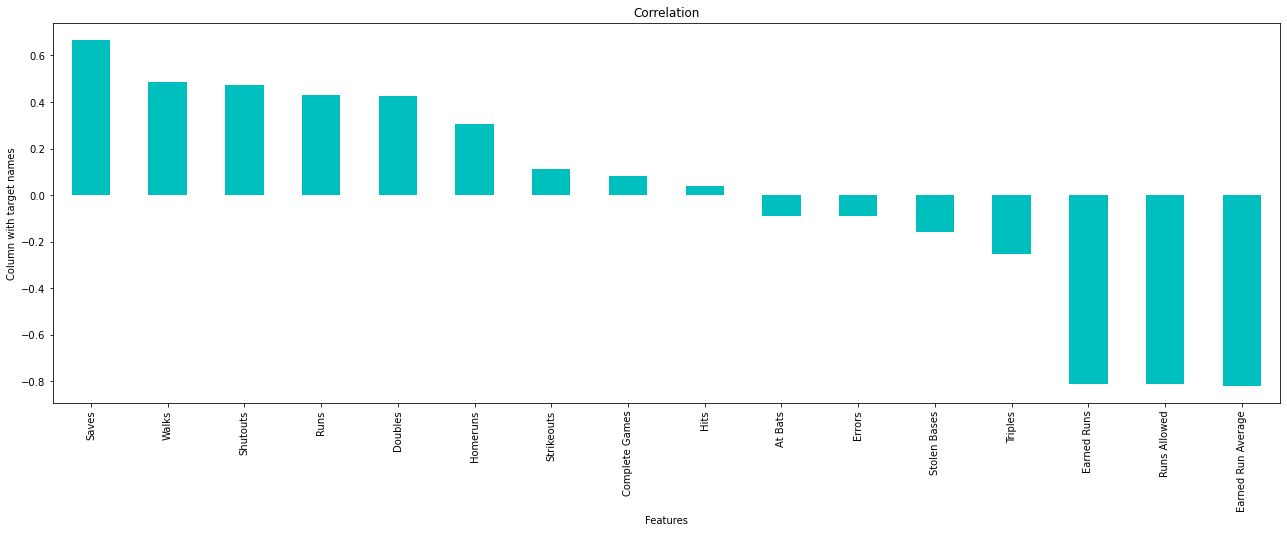

In [313]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

This also shows that Hits and Complete Games are least correlated with Wins.

### Removing Outliers:

In [315]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [316]:
columns=["Runs","Earned Run Average","Shutouts","Saves","Errors"]

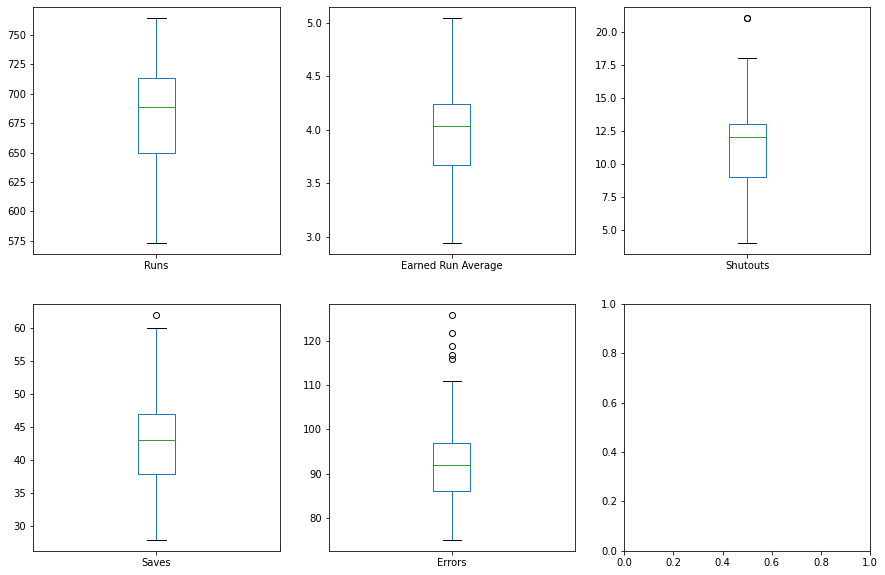

In [317]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
row=col=0
for n,i in enumerate(columns):
    if (n%3==0) & (n>0):
        row+=1
        col=0
    df_new[i].plot(kind="box",ax=ax[row,col])
    col+=1

In [318]:
df_new.shape

(29, 17)

After removing outliers, we have 29 rows and 17 columns.

In [319]:
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

3.33 %


There is 3.33% of data loss with the outlier removal. To some extent outliers are removed.

### Creating X an Y Split

In [320]:
x=df_new.drop("Wins",axis=1)
y=df_new["Wins"]

### Checking and Removing Skewness

In [321]:
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

This is the skewness before removing outliers.

In [322]:
x.skew()

Runs                 -0.215364
At Bats               0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games        0.854980
Shutouts              0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

After removing outliers, Skewness is also reduced but not completely. Here we have skewness for the below columns:
- Hits
- Complete Games
- Shutouts
- Saves
- Errors

In [323]:
from sklearn.preprocessing import PowerTransformer

In [324]:
# Power Transformation to remove skewness
PT=PowerTransformer()
data_PT=PT.fit_transform(x)
x=pd.DataFrame(data_PT,columns=x.columns)

In [325]:
x.skew()

Runs                 -0.024842
At Bats               0.000000
Hits                  0.000000
Doubles              -0.052793
Triples              -0.075139
Homeruns              0.000448
Walks                -0.008572
Strikeouts            0.051530
Stolen Bases         -0.009570
Runs Allowed         -0.011974
Earned Runs          -0.004988
Earned Run Average   -0.000401
Complete Games       -0.045947
Shutouts              0.000529
Saves                -0.000925
Errors                0.065585
dtype: float64

Now, the all the skew values are between -0.5 to +0.5.

### Scaling

As we have done Power Transformation, there is no need of Scaling as standardize is True for PowerTransformer object. Hence, the model will not be biased.

As we have only 17 features in our dataset, we will not perform PCA.

## Building the Model

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

### Finding the Best Random State

In [327]:
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.9215435340417806  on Random State  159


Using the best Random State to create new train_test_split.

In [328]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

### 1.LinearRegression

Mean absolute error: 2.0637261177033506
Mean squared error: 7.9502552170995635
Root Mean squared error: 2.8196196936997664
R2 Score: 0.9215435340417806


<AxesSubplot:title={'center':'Model Coeficients'}>

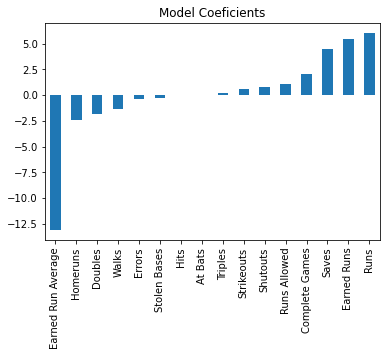

In [329]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(LR.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

### 2. Ridge

Mean absolute error: 2.5673454014476627
Mean squared error: 10.251084465292813
Root Mean squared error: 3.2017314792613094
R2 Score: 0.8988379822503999


<AxesSubplot:title={'center':'Model Coeficients'}>

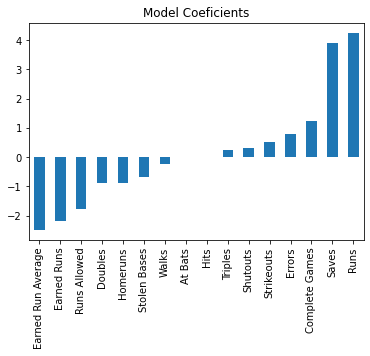

In [330]:
R=Ridge()
R.fit(x_train,y_train)
pred=R.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(R.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

### 3. RandomForestRegressor

Mean absolute error: 6.151111111111111
Mean squared error: 51.83217777777778
Root Mean squared error: 7.199456769630454
R2 Score: 0.4884982456140351


<AxesSubplot:title={'center':'Feature Importance'}>

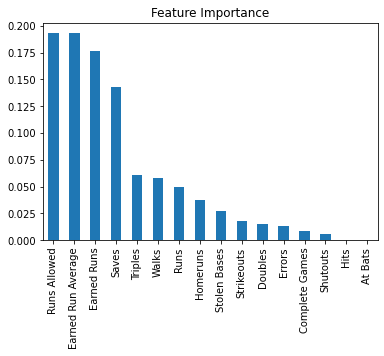

In [331]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(RFR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### 4. GradientBoostingRegressor

Mean absolute error: 6.11545915303971
Mean squared error: 45.218625459998094
Root Mean squared error: 6.724479567966438
R2 Score: 0.5537635645394925


<AxesSubplot:title={'center':'Feature Importance'}>

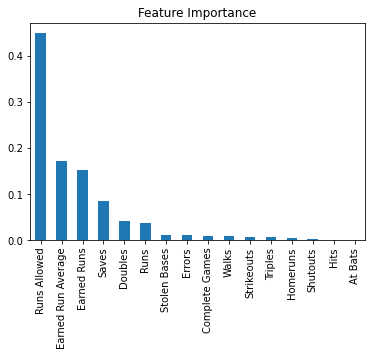

In [332]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(GBR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### 5. ExtraTreesRegressor

Mean absolute error: 5.895555555555557
Mean squared error: 47.62768888888889
Root Mean squared error: 6.901281684505342
R2 Score: 0.5299899122807017


<AxesSubplot:title={'center':'Feature Importance'}>

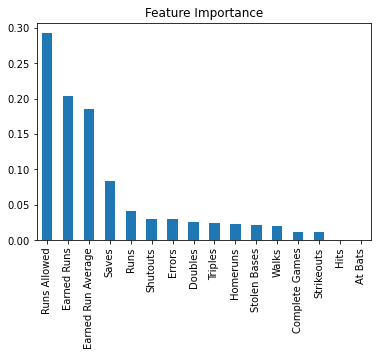

In [333]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(ETR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

### 6. XGBRegressor

Mean absolute error: 5.58632575141059
Mean squared error: 48.48112099519413
Root Mean squared error: 6.962838573110404
R2 Score: 0.5215678849158474


<AxesSubplot:title={'center':'Feature Importance'}>

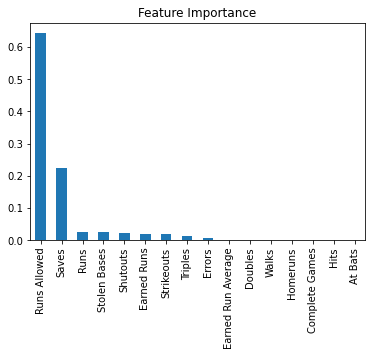

In [334]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred=XGB.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(XGB.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

Here, we observe that LinearRegression is giving the highest R2 score of 92%. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [335]:
from sklearn.model_selection import cross_val_score

In [336]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation for LinearRegression

0.3761324121236935


In [337]:
print(cross_val_score(R,x,y,cv=5).mean()) #cross validation for Ridge

0.4664680433121108


In [338]:
print(cross_val_score(RFR,x,y,cv=5).mean()) #cross validation for RandomForestRegressor

-0.5273454933442412


In [339]:
print(cross_val_score(GBR,x,y,cv=5).mean()) #cross validation for GradientBoostingRegressor

-1.3782507464135496


In [340]:
print(cross_val_score(ETR,x,y,cv=5).mean()) #cross validation for ExtraTreesRegressor

-0.6473932406637231


In [341]:
print(cross_val_score(XGB,x,y,cv=5).mean()) #cross validation for XGBRegressor

-1.110570949654981


By performing cross validation score, I found negative score values for 4 models. Only for LinearRegression and Ridge we are getting expected cross validation score. 

#### As we have observed multicolinearity, let's drop the two columns with highest correlation with other independent variable.

In [342]:
x.drop(["Runs Allowed","Earned Runs"],axis=1,inplace=True)

### Again Finding the Best Random State

In [343]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.9236504267870856  on Random State  159


In [344]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

Mean absolute error: 2.03014676037283
Mean squared error: 7.7367567522419876
Root Mean squared error: 2.7815026069090765
R2 Score: 0.9236504267870856


<AxesSubplot:title={'center':'Model Coeficients'}>

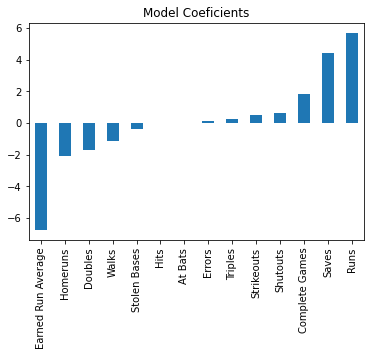

In [345]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(LR.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

Mean absolute error: 2.6539358840749117
Mean squared error: 9.225205414040097
Root Mean squared error: 3.037302325097075
R2 Score: 0.9089617886772359


<AxesSubplot:title={'center':'Model Coeficients'}>

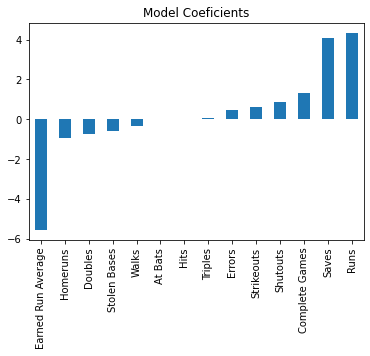

In [346]:
R=Ridge()
R.fit(x_train,y_train)
pred=R.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(R.coef_,x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

Mean absolute error: 5.105555555555556
Mean squared error: 42.7777888888889
Root Mean squared error: 6.5404731395281255
R2 Score: 0.5778507675438596


<AxesSubplot:title={'center':'Feature Importance'}>

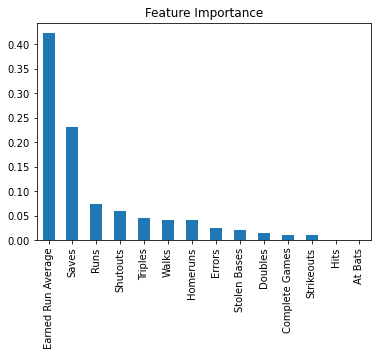

In [347]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(RFR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

Mean absolute error: 5.666919895303632
Mean squared error: 45.67502104362811
Root Mean squared error: 6.7583297525075015
R2 Score: 0.54925966075367


<AxesSubplot:title={'center':'Feature Importance'}>

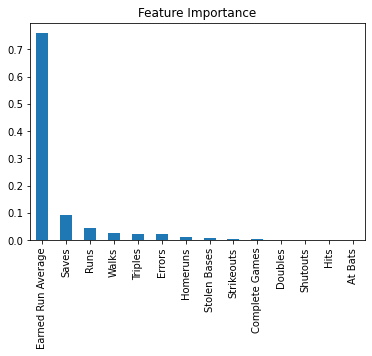

In [348]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(GBR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

Mean absolute error: 5.825236426459418
Mean squared error: 52.96832763511176
Root Mean squared error: 7.277934297251643
R2 Score: 0.47728624044297596


<AxesSubplot:title={'center':'Feature Importance'}>

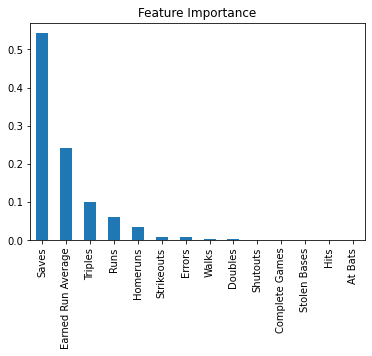

In [349]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred=XGB.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(XGB.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

Mean absolute error: 6.108888888888891
Mean squared error: 57.38413333333334
Root Mean squared error: 7.5752315696177455
R2 Score: 0.4337092105263157


<AxesSubplot:title={'center':'Feature Importance'}>

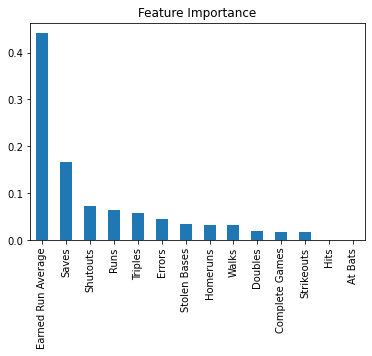

In [350]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(ETR.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

Again we find that LinearRegression is having the highest score. Let's check with the cross validation score.

### Cross Validation Score

In [351]:
from sklearn.model_selection import cross_val_score

In [352]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation for LinearRegression

0.46450359618513026


In [353]:
print(cross_val_score(R,x,y,cv=5).mean()) #cross validation for Ridge

0.4801058500867148


In [354]:
print(cross_val_score(RFR,x,y,cv=5).mean()) #cross validation for RandomForestRegressor

-0.6240522608687661


In [355]:
print(cross_val_score(GBR,x,y,cv=5).mean()) #cross validation for GradientBoostingRegressor

-1.253763893476402


In [356]:
print(cross_val_score(ETR,x,y,cv=5).mean()) #cross validation for ExtraTreesRegressor

-0.2348491824887803


In [357]:
print(cross_val_score(XGB,x,y,cv=5).mean()) #cross validation for XGBRegressor

-0.9116550385975938


Here we observe the improved score for cross validation from the previous one. LinearRegression is our best model for our dataset.

### Hyper Parameter Tuning

In [358]:
from sklearn.model_selection import GridSearchCV

In [377]:
parameters ={'fit_intercept':['True','False'],
            'normalize':['True','False'],
            'n_jobs':[4,5,6,7],
            'copy_X':['True','False']}

In [378]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [379]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [4, 5, 6, 7],
                         'normalize': ['True', 'False']})

In [380]:
GCV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 4, 'normalize': 'True'}

In [381]:
Final_mod=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=4,normalize=True)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

92.36504267870862


- After Hyper Parameter tuning, the improved score of the best model SVC is 92.37%

### Saving the Model

In [384]:
import joblib
joblib.dump(Final_mod,"baseball_model.pkl")

['baseball_model.pkl']